In [4]:
import torch
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from models import *
from utils import *

device = torch.device("cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu")
print(f'Using device: {device}')

Using device: mps


In [2]:
def count_valid_files(directory):
    return sum(1 for filename in os.listdir(directory) if not filename.startswith('.') and os.path.isfile(os.path.join(directory, filename)))

image_data_dir = './Image_data/DATASET/train'
image_lengths = {subdir: count_valid_files(os.path.join(image_data_dir, subdir)) for subdir in os.listdir(image_data_dir) if not subdir.startswith('.') and os.path.isdir(os.path.join(image_data_dir, subdir))}

adjacency_dir = './output_data/adjacency'
adjacency_lengths = {subdir: count_valid_files(os.path.join(adjacency_dir, subdir)) for subdir in os.listdir(adjacency_dir) if not subdir.startswith('.') and os.path.isdir(os.path.join(adjacency_dir, subdir))}

print("Image data lengths:")
print(image_lengths)

print("Adjacency data lengths:")
print(adjacency_lengths)

Image data lengths:
{'7': 2524, '6': 705, '1': 1290, '4': 4772, '3': 717, '2': 281, '5': 1982}
Adjacency data lengths:
{'adjacency_2': 241, 'adjacency_5': 664, 'adjacency_4': 1915, 'adjacency_3': 256, 'adjacency_6': 524, 'adjacency_1': 1165, 'adjacency_7': 2127}


In [14]:
image_df = pd.DataFrame(list(image_lengths.items()), columns=['Category', 'Image Count'])
adjacency_df = pd.DataFrame(list(adjacency_lengths.items()), columns=['Category', 'Adjacency Count'])
adjacency_df['Category'] = adjacency_df['Category'].str.extract(r'(\d+)')

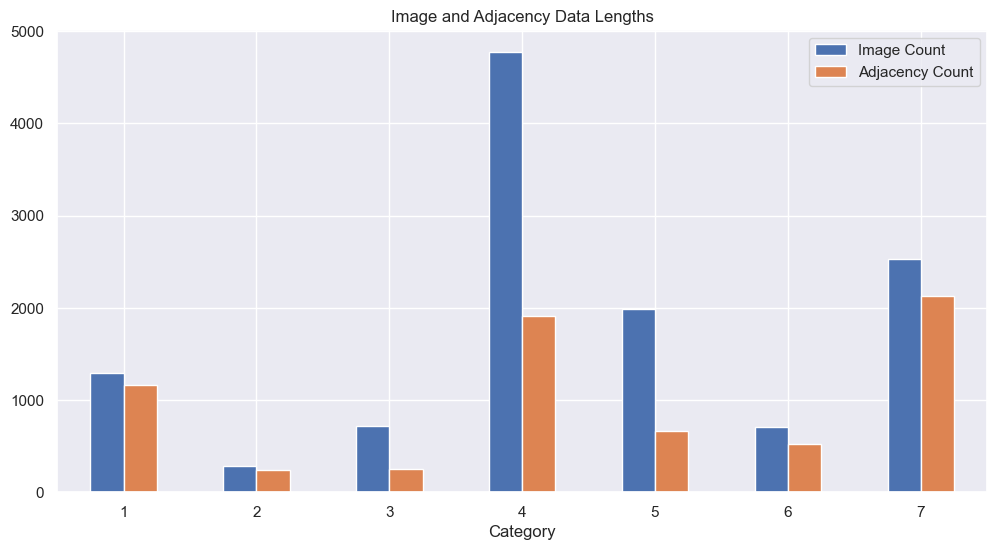

In [17]:
comparison_df = pd.merge(image_df, adjacency_df, on='Category', how='outer')
# plot, don't rotate x-axis labels, and make it look nice
sns.set_theme()
comparison_df.plot(x='Category', kind='bar', figsize=(12, 6))
plt.xticks(rotation=0)
plt.title('Image and Adjacency Data Lengths')
plt.show()

In [18]:
comparison_df

,Category,Image Count,Adjacency Count
0,1,1290,1165
1,2,281,241
2,3,717,256
3,4,4772,1915
4,5,1982,664
5,6,705,524
6,7,2524,2127
